# Data Analysis Using Python Pandas, Numpy, Seaborn and Matplot Library.

This notebook is for the data analysis and machine learning model that has been done to the OSMI dataset which is a survey for the people who work in Tech industry to understand about the effects of mental health. The dataset has been manually cleaned first to make it more workable so the dataset has been filtered and renamed. 

The first thing I have done here is to import all the python libraries. Pandas is a Python library that provides data structures for working with structured data. NumPy (Numerical Python) offers support for sizable, multi-dimensional arrays and matrices, as well as a vast array of mathematical operations that may be performed on these arrays. And matplot helps in visualising the data that we have in the forms of graph. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


I have imported the dataset here. After this I am going to make this data more clear and readable by using the libraries that has been imported. The next step also shows the information of the dataset

In [2]:
df = pd.read_csv('survey.csv')
df


,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,Female,United States,IL,NaN,No,Yes,Often,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,44,M,United States,IN,NaN,No,No,Rarely,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,32,Male,Canada,NaN,NaN,No,No,Rarely,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,31,Male,United States,TX,NaN,No,No,Never,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,NaN,No,Yes,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,32,Male,United States,IL,No,Yes,Yes,Often,Yes,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,No,Yes,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,46,f,United States,NC,No,No,No,NaN,Yes,Yes,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   state                      744 non-null    object
 4   self_employed              1241 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             995 non-null    object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

In the below code I am trying to find if there is any missing values and I am doing that my getting the percentage. The data.isna() 'data', where each element is True if the corresponding element in data is missing (i.e., NaN), and False otherwise. The .sum() helps in returning the sum of missing values. And the rest of the code returns number of rows, calculates the missing values and multiplies it by 100 to get the percentage. As we can see that there is significant missing values in 4 columns(state, Self_employed, work_interfere and comments). 

In [4]:
df.isna().sum()/len(df.index)*100

Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        40.905481
self_employed                 1.429706
family_history                0.000000
treatment                     0.000000
work_interfere               20.969023
remote_work                   0.000000
tech_company                  0.000000
benefits                      0.000000
care_options                  0.000000
wellness_program              0.000000
seek_help                     0.000000
anonymity                     0.000000
leave                         0.000000
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical            0.000000
obs_consequence               0.000000
comments                     86.973789
dtype: float64

In the below code I have gotten unique age that we have throughout this dataset. Some of the age below is in negative which is weird and it shows that that data collection quality has not been good so I am going to clean this column even more by putting an age range. Which is shown in the code below this. 

In [5]:
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In the below code, I have basically said that wherever there is a number less than 12, replace it with 15. And where there is a number bigger than 75 replace that with 75. This just helps to remove all the outliers and NaNs and gives us more accurate data. The 'loc' method is used to select the rows and column where the conditions need to be applied. 

In [6]:
df.loc[df.Age<12,'Age']=15
df.loc[df.Age>75,'Age']=75

I have done the same for the gender category below. The reason I did it that way is because alot of people have identified with different genders or have used different words to describe the same gender. So I have cleaned the data here by putting the into three categories where all 'Cis Male' are in Male category, All 'Cis Female' are in Female category and all other genders like 'gender fluid', 'Transgender' are in 'Other' category. This will help us to visualise the data better. 

In [7]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [8]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

In [9]:
df['Gender'].value_counts()

Male      991
Female    247
Other      21
Name: Gender, dtype: int64

I am making a copy of the dataset so that I keep them seperated for the analysis part and the machine learning part. This will ensure that the dataset does not get affected while performing various tasks. 

In [10]:
copydataset = df.copy()

# Visual Data Analysis

In the below code the result shows answer to the quetion "Have you gotten treatment for a mental health condition ?". The percentage of people gotten treatment is 50%. Mental health is still seen as taboo in tech industry and a lot of people do not take it seriuosly or do not get treatment for it.

The way the code works is that I have set a background style for the graph and size of the graph. I have then calculated the count and percentage of survey respondents who reported whether they received mental health treatment or not by using 'values-count' and 'Percentage'. It then creates the graph by using Seaborn. 

The function 'value_counts()' counts the instances of each distinct value in the 'Treatment' column.
'(normalize = True)' divides each value by the total value to normalise the count. Counts are changed to percentages in this manner.
The index of the resultant Series is renamed to "Treatment" using the command 'rename_axis'.
Rename the column containing the normalised counts to "Percentage" by using the command 'reset_index'. This changes the resultant Series into a DataFrame.

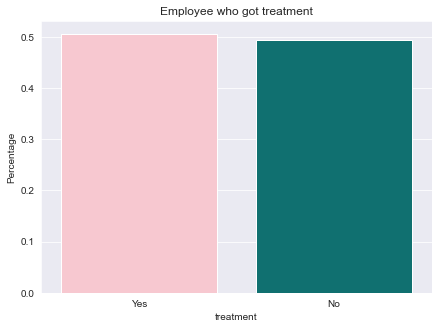

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize = (7,5))
data_percent = copydataset['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')
sns.barplot(x = 'treatment', y = 'Percentage', data = data_percent, palette=['pink', 'teal'])
plt.title('Employee who got treatment')
plt.show()

## Gender Analysis

Below I have also made a bar plots to show the visual analysis of the gender column. I have done that in order to understand more about distribution across the dataset and also to understand which group is effecting more.

This code generates a figure with two subplots.

Using a barplot from the Seaborn library, the first subplot displays the gender-specific percentage of survey respondents. The count of each gender group is first obtained using the "Gender" column of the "copydataset" DataFrame, which is then normalised to obtain the percentage. The'sns.barplot' method is then used to plot the barplot on the 'data percent' DataFrame.

Using a countplot from the Seaborn library, the second subplot displays the count of survey respondents by gender and treatment. The 'Treatment' column of the'copydataset' DataFrame is utilised to construct separate bars for each treatment group for each gender category. The 'Gender' column serves as the x-axis

The first line of the code lets me make one plot below another. nrows, ncols menas that there are two row(two graphs) in one column. axes[0] and axes[1] are the respective variables to call the two sub plots.

All the graphs from here on use the same methodolgy and implementation.  

ANALYSIS OF THE GRAPH:

The two plots show the visual answer to the question "What is your gender?". It is important to look into this data analysis as it says a lot about which gender dominates the field, and it can also make us think about why people might be suffereing from the mental health issues. 

As we can see from the graph alomost 79% of the people are male which tells us that Tech industry is a male dominated field which is not a suprise. We can see that there are only around 20% of female and 1% of other gender. The reason for mental health issues from minority groups could be discrimination that they might face in this field but htere could be other factors as well. We can also see from the second plot that that female and other gender also are more likely to accept treatment for mental health than men. 

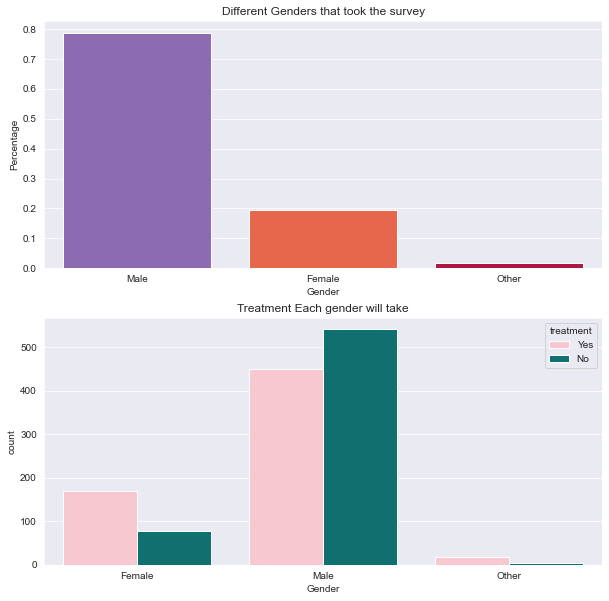

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# subplot 1
data_percent = copydataset['Gender'].value_counts(normalize=True).rename_axis('Gender').reset_index(name='Percentage')
sns.barplot(x='Gender', y='Percentage', data=data_percent, palette=['#8B5FBF', '#FF5733', '#C70039'], ax=axes[0])
axes[0].set_title('Different Genders that took the survey')

# subplot 2
sns.countplot(copydataset['Gender'], hue=copydataset['treatment'], palette=['pink', 'teal'], ax=axes[1])
axes[1].set_title('Treatment Each gender will take')

plt.show()

## Age Analysis

ANALYSIS OF THE GRAPH:
From the graph we can see that most of the employess in the dataset are between the age of 20-40. It means the tech industry is dominated by young people. Which can be why most of the mental health struggle is seen in young people as the pressure of work, home and to prove themselves can be some of the reasons. 

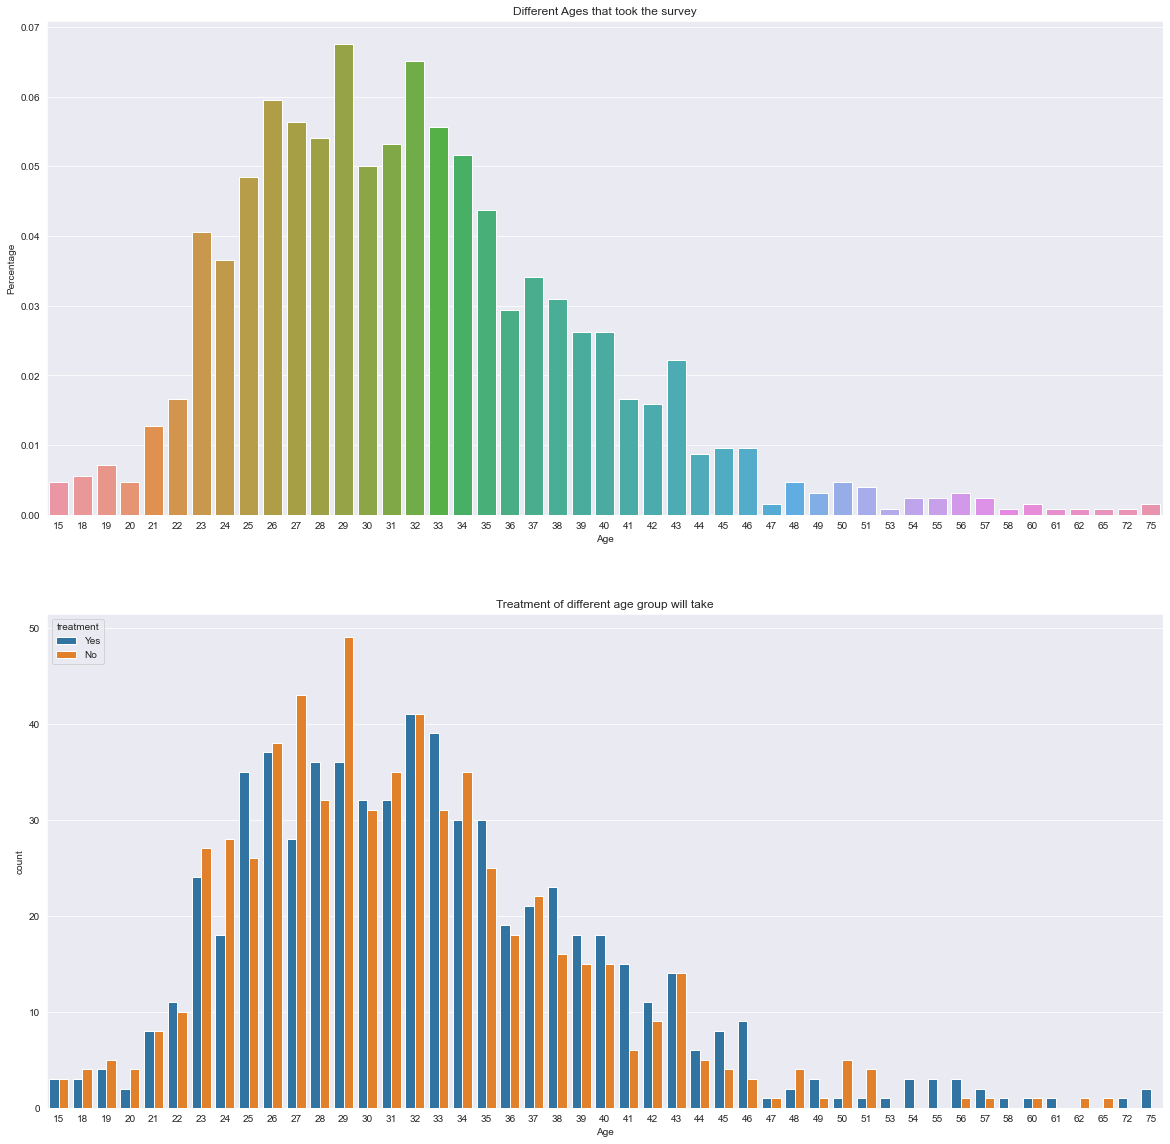

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

# subplot 1
data_percent = copydataset['Age'].value_counts(normalize=True).rename_axis('Age').reset_index(name='Percentage')
sns.barplot(x='Age', y='Percentage', data=data_percent, ax=axes[0])
axes[0].set_title('Different Ages that took the survey')

# subplot 2
sns.countplot(copydataset['Age'], hue=copydataset['treatment'], ax=axes[1])
axes[1].set_title('Treatment of different age group will take')

plt.show()

## Family History

The below code shows the visual analysis to the question " is there any family history of mental illness?"

ANALYSIS OF THE GRAPH:

The graph shows that atleast 40% of the people have family history of mental health ilness. The second plot also shows that people who have had family history are more likely to get a treatment. Understanding this is important as mental health problems can be heridetry so visualising that makes it easier to understand the problems people are facing. 

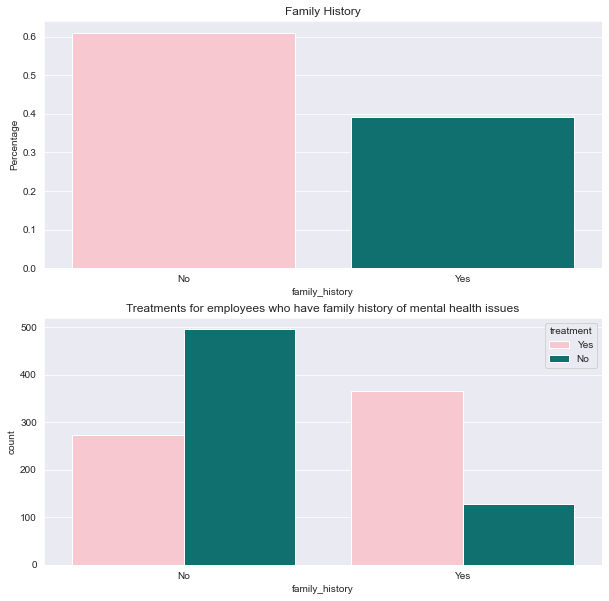

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# subplot 1
data_percent = copydataset['family_history'].value_counts(normalize=True).rename_axis('family_history').reset_index(name='Percentage')
sns.barplot(x='family_history', y='Percentage', data=data_percent, palette=['pink', 'teal'], ax=axes[0])
axes[0].set_title('Family History')

# subplot 2
sns.countplot(copydataset['family_history'], hue=copydataset['treatment'], palette=['pink', 'teal'], ax=axes[1])
axes[1].set_title('Treatments for employees who have family history of mental health issues')

plt.show()


## Work Involvement

There are two subplots below they are the answer to the question "has you work made any involvment for your mental health". 

DATA ANALYSIS OF THE GRAPH:

We can see from the below graph more than 20% of time companies have not made any inisiative and more that 45% of time companies have sometimes made an initiative to question about thier employess mental health. We can also see from the second plot that the company that never asks about there employess wellbeing, employee there are less likely to get treatment for their mental health than other employess in differnt companies. 

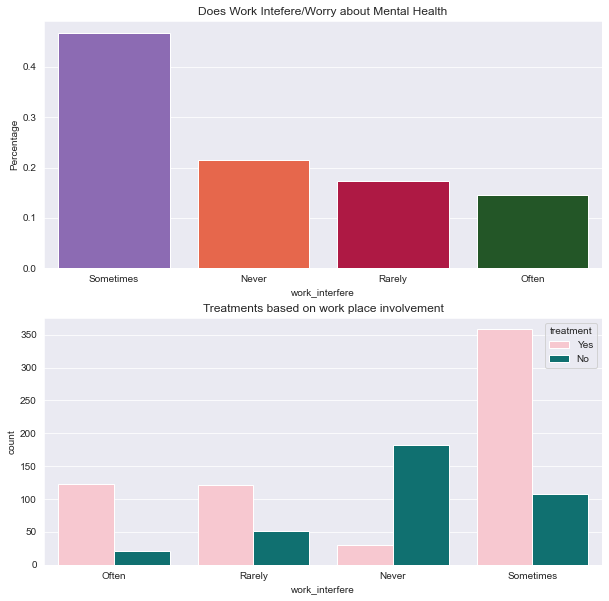

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# subplot 1
data_percent = copydataset['work_interfere'].value_counts(normalize=True).rename_axis('work_interfere').reset_index(name='Percentage')
sns.barplot(x='work_interfere', y='Percentage', data=data_percent, palette=['#8B5FBF', '#FF5733', '#C70039', '#1b5e20'], ax=axes[0])
axes[0].set_title('Does Work Intefere/Worry about Mental Health')

# subplot 2
sns.countplot(copydataset['work_interfere'], hue=copydataset['treatment'], palette=['pink', 'teal'], ax=axes[1])
axes[1].set_title('Treatments based on work place involvement')

plt.show()


## Negative Consequences

The below code showcases two subplots that gives the answer to the question " Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?". This is important to know about how employees are treated well their mental health problems are disclossed. Around 15% of people said yes, and out of the 15% around 65-70% want to get treatment. 

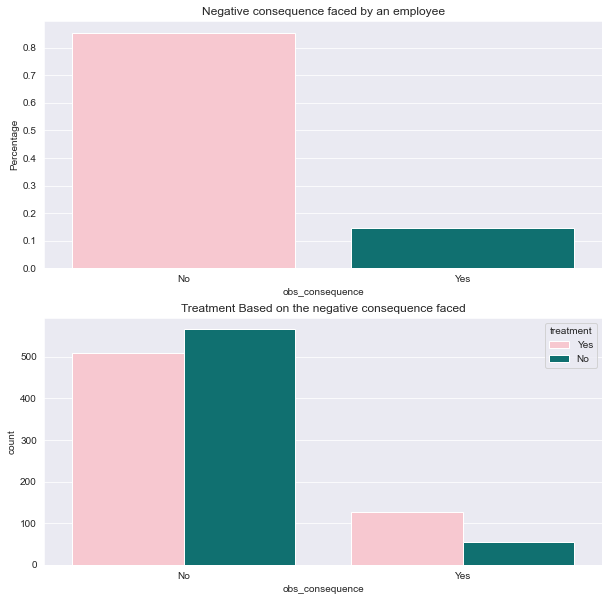

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# subplot 1
data_percent = copydataset['obs_consequence'].value_counts(normalize=True).rename_axis('obs_consequence').reset_index(name='Percentage')
sns.barplot(x='obs_consequence', y='Percentage', data=data_percent, palette=['pink', 'teal'], ax=axes[0])
axes[0].set_title('Negative consequence faced by an employee')

# subplot 2
sns.countplot(copydataset['obs_consequence'], hue=copydataset['treatment'], palette=['pink', 'teal'], ax=axes[1])
axes[1].set_title('Treatment Based on the negative consequence faced')

plt.show()


## Benefits

The below code displays two subplots based on the question "Do their emplyers give them any mental health benefits?".

DATA ANALYSYS OF THE GRAPH:

Only 40% of the employess get mental health benefits and from the second plot we can also see that they are the large number of people that want to be treated for their problems. Another interesting thing is that people who do not get benefits also majorly want to get mental health treatment. 

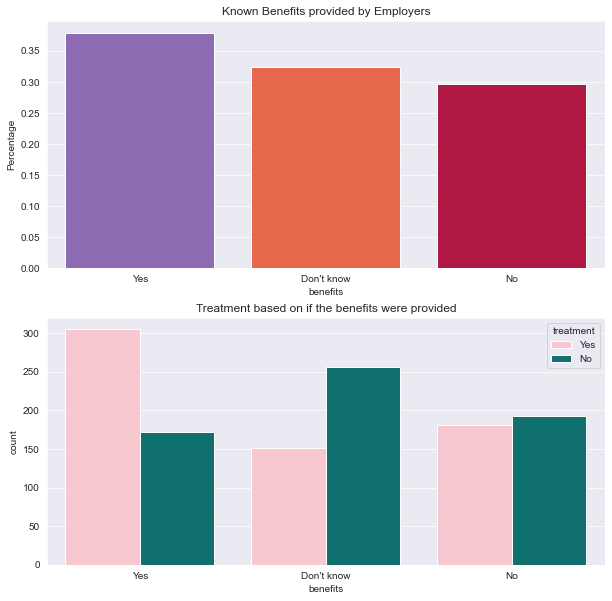

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# subplot 1
data_percent = copydataset['benefits'].value_counts(normalize=True).rename_axis('benefits').reset_index(name='Percentage')
sns.barplot(x='benefits', y='Percentage', data=data_percent, palette=['#8B5FBF', '#FF5733', '#C70039'], ax=axes[0])
axes[0].set_title('Known Benefits provided by Employers')

# subplot 2
sns.countplot(copydataset['benefits'], hue=copydataset['treatment'], palette=['pink', 'teal'], ax=axes[1])
axes[1].set_title('Treatment based on if the benefits were provided')

plt.show()

## Anonimity

The below code shows the analysis for the question "Is your anonymity protected when you choose to talk about mental health and substance abuse?".

DATA ANALYSIS OF THE GRAPH:

Around 30% say that their anonymity was protected and from the second graph we can see that they are more likely to get treatment. Suprisingly emplyees whose anonymity is protect are also the ones who are more likely to get treatment. 

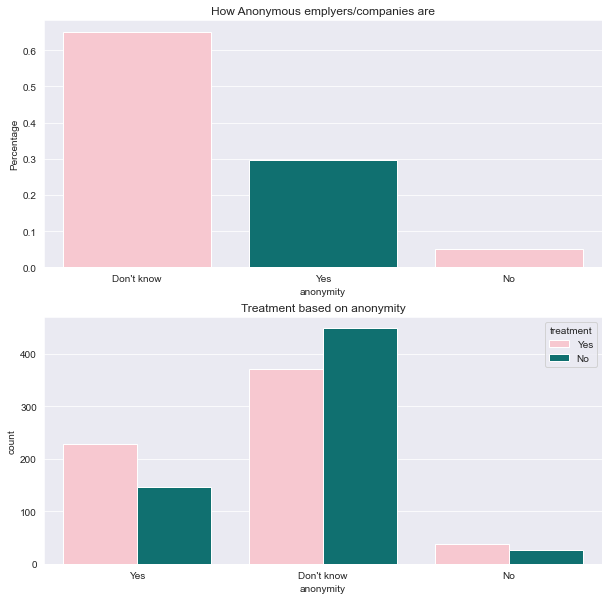

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# subplot 1
data_percent = copydataset['anonymity'].value_counts(normalize=True).rename_axis('anonymity').reset_index(name='Percentage')
sns.barplot(x='anonymity', y='Percentage', data=data_percent, palette=['pink', 'teal'], ax=axes[0])
axes[0].set_title('How Anonymous emplyers/companies are')

# subplot 2
sns.countplot(copydataset['anonymity'], hue=copydataset['treatment'], palette=['pink', 'teal'], ax=axes[1])
axes[1].set_title('Treatment based on anonymity')

plt.show()

## Conclusion

Based on the analysis that was done:

•	50% of the people who took the survey have had mental health treatment.
•	Tech industry is filled with young people, most people working are between the age of 25 and 35, and this age         group also sees the most mental health problems. 
•	Tech industry is dominated by men (almost 80%) but still women are the ones who are more likely to get a treatment     than men and Queer people. 
•	Almost 40% of people have had family members who have suffered from mental health issues, and they are also the       group of people who are more likely to have a treatment. 
•	Work/Employers hardly ever interfere when their employees are having a crisis, and when the work does interfere,       the people are more likely to get a treatment. Surprising factor was also that when work rarely interfere, they       will still get treatment. 
•	15% of people have had negative consequences with their work/employer after they disclosed about their mental         health issues. But majority of those people are still likely to get treatment. 
•	More than 35% of people get company benefits regarding mental health, around 30% do not get any benefits. And         people who get benefits are more likely to get treatment. 
•	30% of people’s company keep anonymity of employees regarding their health issues. More than 65% do not know if       their company is anonymous.



## Machine Learning and Models

The machine learning models part starts here, from the above processing of data and finding NaN values, I found that 86% of the comments column had NaN values so I am dropiing that column, and I am also droppinf country and state column as the 70% of people who took the survey are from US so I do not want to hold that bias of the country when training the dataset.

In [20]:
df = df.drop(['Country','state','comments'], axis = 1)

# Data processing

In the below I have now started to process the data. So the train_test_split will help us split the data into two set one train_set and a test_set. test_size=0.15 is what amount of percentage will be used for testing. In this cas 15% of data will be used for testing and 85% will be used for training the datset. As you can see below that I have used stratify to train and test the dataset. the reason why I am using this is to show that it keeps the same distribution of the target within the test and training dataset. In other words, it preserves the propotion of how the data is distributed in the target column and shows the same distribution in the train_test_split. By doing this it helps the model by preventing it from being trained and tested on an unrealistic data distribution. lastly random_state helps to make sure that the train_test_split is reproducible. These things will help us to build the machine learning models. 

In [21]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df,test_size=0.15,stratify=df['treatment'],random_state=42 )


Using the .mode() method, the code first determines the mode of the "self employed" column in the training data and stores it in the variable se_mode. Next, using the.fillna() method, it substitutes the mode value for any missing values in the'self_employed' column.

The code then uses the.isna() method to find the rows where the 'work interfere' column is missing, and boolean indexing is used to filter the training data. The .value counts() method is then used to count the instances of each distinct value in the 'treatment' column for the filtered data. This makes it easier to determine if there is a pattern or connection between the missing values for the "work interfere" column and the "treatment" column.

In [22]:
selfemployed_column = train_data['self_employed'].mode().values[0] 
train_data['self_employed'].fillna(selfemployed_column,inplace=True)
train_data[train_data['work_interfere'].isna()]['treatment'].value_counts()

No     223
Yes      3
Name: treatment, dtype: int64

This code uses the.fillna() method to replace any missing values in the training data's 'work interfere' column with the word "Never."

In [23]:
train_data['work_interfere'].fillna('Never',inplace = True)

The train_data DataFrame is divided into two pieces by this code: X_train and y_train.

With the exception of the "treatment" column, which is removed using the drop() function with the axis=1 (i.e., columns) specification, X_train is a new DataFrame that contains all the columns from train data.

Only the 'treatment' column from train data was copied into the pandas series y_train using the copy() technique.

A machine learning model will be trained using the training data using these two new objects, X_train and y_train.

In [24]:
X_train = train_data.drop('treatment',axis=1)
y_train = train_data['treatment'].copy()

In [25]:
train_data.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

With each inner list containing the potential values for a category column in the dataset, this generates a list of lists. The category columns in these lists will be input to an ordinal encoder in order to create numeral values.

In [26]:
Gender = ['Female','Male','Other']
SelfEmployed = ['No','Yes']
FamilyHistory = ['No','Yes']
WorkInterfere = ['Never','Rarely','Sometimes','Often']
Remote = ['No','Yes']
Company = ['No','Yes']
CompanyBenefits = ['No','Don\'t know','Yes'] 
CompanyOptions = ['No','Not sure','Yes']
Wellness  =['No','Don\'t know','Yes']
Help = ['No','Don\'t know','Yes']
Anonymity = ['No','Don\'t know','Yes']
CompanyLeaves = [ 'Very easy', 'Somewhat easy',"Don't know" ,'Somewhat difficult','Very difficult']
Consequences = ['No','Maybe','Yes']
PhysicalHealth = ['No','Maybe','Yes']
Coworkers = ['No','Some of them','Yes']
Supervisor = ['No','Some of them','Yes']
Interview = ['No','Maybe','Yes']
PhysicalHealthInterview = ['No','Maybe','Yes']
MentalVSPhysical = ["Don't know",'No','Yes']
ObsConsequence = ['No','Yes']

columns_for_encoder = [Gender, SelfEmployed, FamilyHistory, WorkInterfere, Remote, Company, CompanyBenefits, CompanyOptions,
                      Wellness, Help, Anonymity, CompanyLeaves, Consequences, PhysicalHealth, Coworkers, Supervisor,
                      Interview, PhysicalHealthInterview, MentalVSPhysical, ObsConsequence]


In [27]:
ChoosenModelFeatures = list(X_train.columns)

The X_train DataFrame's categorical characteristics are converted into ordinal numbers in this code using the OrdinalEncoder from Scikit-Learn.

Categories=list(columns_for_encoder), where columns for encoder is a list of lists containing all potential categories for each category characteristic, is used to setup the encoder.

Finally, the feature in X_train are chosen, because the Age feature is in the first column, the category features are chosen, beginning with the second column. This is done by the use of X_train.iloc[:,1:].

"ord_encoder.fit_transform()" then helps to tranform the categorical features. Then the resulting values that were transformed are assigned back to the same X-train.


In [28]:
from sklearn.preprocessing import OrdinalEncoder
numeric_encoder = OrdinalEncoder(categories=list(columns_for_encoder))
X_train[ChoosenModelFeatures[1:]] = numeric_encoder.fit_transform(X_train.iloc[:,1:])

In [29]:
X_train.head()

,Age,Gender,self_employed,family_history,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
676,22,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0
88,29,0.0,0.0,0.0,2.0,0.0,1.0,2.0,2.0,0.0,...,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
86,39,1.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,...,1.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1210,24,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
505,46,1.0,0.0,0.0,2.0,0.0,1.0,2.0,2.0,2.0,...,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0


The below code helps in feature scaling which is a standard practise in machine learning. 

In [30]:
from sklearn.preprocessing import StandardScaler
scaled_model = StandardScaler()
X_train[ChoosenModelFeatures] = scaled_model.fit_transform(X_train)

In the code below the LabelEncode is used to transform the variable in the y_train into numnerical values. This is done so that the target variables are numeric.

In [31]:
from sklearn.preprocessing import LabelEncoder
label_numeric_encode = LabelEncoder()
y_train = label_numeric_encode.fit_transform(y_train)


In [32]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Below, I'll explain what an F1 score essentially implies. In order to assess the predictive performance a machine learning model can have, F1-score uses both precision and recall. The degree of false positives and false negatives is essentially measured by precision and recall, respectively. After reading up on fundamental machine learning models, it became clear that the f1-score has several benefits, which is why I've applied it here to test how it fares in a different models. It can also help us understand more if there is any underfitting or overfitting in our models. 

In [33]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

This is the implementation for us to get the accuracy scores on our train and test set usinf F1 Score. 

Four parameters are passed to the function train evaluate:

model: a scikit-learn example of a classification model
X train: The training set's feature matrix
y train: The training set's goal vector 
name: a string containing the model's name

The fit method is first used by the function to fit the model on the training set. Once predictions have been made on the training set using the predict technique, they are compared to the actual target values using the scikit-learn f1_score metric. This result is stored in the variable f1_train.

The cross val score function from Scikit-Learn is then used by the function to perform cross-validation. The final score is the average of all the scores after computing the f1_score for each fold of the cross-validation process. This result is stored in the variable f1_val.

And then the results are returned. This implementation will be followed for all the machine learning models.

In [34]:
def train_evaluate(model,X_train,y_train,name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    f1_train = f1_score(y_train,y_pred)

    #Cross validation
    f1_val = cross_val_score(model,X_train,y_train,scoring='f1',cv=10)
    
    # returning the scores
    score = pd.DataFrame({'Model_Name' : name ,'F1 Score for train set' : [f1_train], 'F1 score for validation set' : [f1_val.mean()]})
    return score

train_evaluate function helps us to build a logistic regression model. Because we have a small dataset we use these functionalities "LogisticRegression(penalty='l1',solver='liblinear')", this helps us to prevent overfitting. Overfitting is when the model learns all the unwanted noise and stuff which then can lead to low accuracy and a bad machine learning model. 

Model.fit(X_train,y_train) is used in the train evaluate() function to first train the model on the training set of data. Then, using model.predict(X_train), the predicted labels for the training data are obtained.

The F1 score for the training data is then determined using the f1_score() method from sklearn.metrics. The variable f1 train holds the value of this score.

Then, cross-validation is carried out on the training data using cross val score() from sklearn.model selection. The evaluation parameter is the F1 score, and cv=10 directs that 10-fold cross-validation be applied. The variable f1 val contains the mean F1 score over all 10 folds.

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
regression_model = LogisticRegression(penalty='l1',solver='liblinear')
train_evaluate(regression_model,X_train,y_train,'Logistic Regression Model')

,Model_Name,F1 Score for train set,F1 score for validation set
0,Logistic Regression Model,0.826521,0.819706


## Decision Tree Classifier

Next the decision tree model is applied here:  max_leaf_nodes is chosen as 4 as the dataset is small so the decision tree needs to be simple. This will ensure that there is no overfitting or underfitting in the model.

In [36]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_leaf_nodes=4,random_state=42)
train_evaluate(decision_tree_model,X_train,y_train,'Decision Tree Classifier Model')

,Model_Name,F1 Score for train set,F1 score for validation set
0,Decision Tree Classifier Model,0.851698,0.851769


## SVM

In [37]:
from sklearn.svm import SVC
SVM_Model = SVC()
train_evaluate(SVM_Model,X_train,y_train,'Support Vector Model')

,Model_Name,F1 Score for train set,F1 score for validation set
0,Support Vector Model,0.890265,0.836086


## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_classifier_model = RandomForestClassifier(random_state=42)
train_evaluate(RandomForest_classifier_model,X_train,y_train,'Random Forest Classifier Model')

,Model_Name,F1 Score for train set,F1 score for validation set
0,Random Forest Classifier Model,1.0,0.850044


## Gradient Boost

A strong ensemble model called the GradientBoostingClassifier combines weak classifiers into a strong one via boosting. While subsample regulates the percentage of samples to be utilised for fitting the various base learners, random state is employed to assure reproducibility of the findings. In this scenario, each base learner will receive 80% of the samples.

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
Gradient_boost_model = GradientBoostingClassifier(random_state=42,subsample=0.8)

train_evaluate(Gradient_boost_model,X_train,y_train,"Gradient Boosting Classifier Model")

,Model_Name,F1 Score for train set,F1 score for validation set
0,Gradient Boosting Classifier Model,0.895629,0.843739


## XG Boost

In [40]:
from xgboost import XGBClassifier
XG_boost_model = XGBClassifier(verbosity=0)

In [41]:
train_evaluate(XG_boost_model,X_train,y_train,"XG Boost Classifier Model")

,Model_Name,F1 Score for train set,F1 score for validation set
0,XG Boost Classifier Model,0.999075,0.813504


## Performance of all Models

In [42]:
ModelScore = pd.DataFrame({'Train_Score' : [0.8265,0.8516,0.8902,1.0,0.8956,0.9990], 'Val_score' : [0.8197, 0.8517, 0.8360,0.8500,0.8437,0.8135]}, index = ['Logistic regression','Decission Tree','SVM','Randome Forest', 'Gradient Boost', 'XGBoost']) 
ModelScore
                 

,Train_Score,Val_score
Logistic regression,0.8265,0.8197
Decission Tree,0.8516,0.8517
SVM,0.8902,0.8360
Randome Forest,1.0000,0.8500
Gradient Boost,0.8956,0.8437
XGBoost,0.9990,0.8135


As we can see from above there seems to be overfitting in random forest classifier and XGBoosy, so in order to solve that GRIDSeachCV will be used on those two models to get better accuracy. 

To identify the ideal hyperparameters for the models, this code sets up a grid search. The hyperparameter values to be tested during the grid search are defined by the param_distribs dictionary. Different parameters are examined to understand which will be the best to use. 


In [43]:
from sklearn.model_selection import GridSearchCV


This will tell us the best parameter for better model accuracy.

This will give us new results after the model is run.

From here on same thing is done for the XGBoost as well. 

In [44]:
from sklearn.model_selection import GridSearchCV

parameters_needed = [
    {'n_estimators':[3,10,30,50,100],'max_features':[2,4,6,8],'max_depth' : [1,2,3,4]}
]



RandomForest_classifier_model = RandomForestClassifier(random_state=42)
model_tuning = GridSearchCV(RandomForest_classifier_model, parameters_needed, cv=5,
                           scoring='f1',
                           return_train_score=True)
model_tuning.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 100]}],
             return_train_score=True, scoring='f1')

In [45]:
model_tuning.best_estimator_

RandomForestClassifier(max_depth=4, max_features=4, n_estimators=50,
                       random_state=42)

In [46]:
train_evaluate(model_tuning.best_estimator_,X_train,y_train,"RandomForest Tuned")

,Model_Name,F1 Score for train set,F1 score for validation set
0,RandomForest Tuned,0.866209,0.852866


In [47]:
parameters_needed = [
    {'n_estimators':[3,10,30,50,100],
    'eta' : [0.01,0.025, 0.05, 0.1],
    'max_features':[2,4,6,8],
    'max_depth' : [1,2,3,4],
    'subsample': [0.5,0.75],
    'booster':['gblinear','gbtree']}
]

XG_boost_model = XGBClassifier(verbosity = 0)
model_tuning = GridSearchCV(XG_boost_model, parameters_needed, cv=5,
                           scoring='f1',
                           return_train_score=True)
model_tuning.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [48]:
model_tuning.best_estimator_

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_features=2, max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [49]:
train_evaluate(model_tuning.best_estimator_,X_train,y_train,"XGBoost Finetuned")

,Model_Name,F1 Score for train set,F1 score for validation set
0,XGBoost Finetuned,0.860781,0.856181


In [50]:
Tuning_scores = pd.DataFrame({'Train_score' : [0.8662,0.8601],'Val_score' : [0.8528,0.8563]} 
                        ,index=['RandomForest','XGBoost'])
Tuning_scores

,Train_score,Val_score
RandomForest,0.8662,0.8528
XGBoost,0.8601,0.8563
